In [1]:
import pandas as pd
df = pd.read_csv('world cup.csv')
df = df.drop(['Game_id', 'Team', 'Keeper', 'Penalty_Number', 'Elimination'], axis=1) # unnecessary
df = df.drop(df[df.Goal == 0.0].index) # dropping missed penalities
df

,Zone,Foot,OnTarget,Goal
0,7.0,R,1.0,1.0
1,9.0,R,1.0,1.0
2,6.0,R,1.0,1.0
3,2.0,R,1.0,1.0
4,9.0,R,1.0,1.0
...,...,...,...,...
299,7.0,R,1.0,1.0
300,7.0,R,1.0,1.0
301,4.0,R,1.0,1.0
302,7.0,R,1.0,1.0


In [2]:
coordinate = [(0, 0) for i in range(1, 221)] # initializing coordinate values
df['Coordinates'] = coordinate
df = df.dropna()
df

,Zone,Foot,OnTarget,Goal,Coordinates
0,7.0,R,1.0,1.0,"(0, 0)"
1,9.0,R,1.0,1.0,"(0, 0)"
2,6.0,R,1.0,1.0,"(0, 0)"
3,2.0,R,1.0,1.0,"(0, 0)"
4,9.0,R,1.0,1.0,"(0, 0)"
...,...,...,...,...,...
299,7.0,R,1.0,1.0,"(0, 0)"
300,7.0,R,1.0,1.0,"(0, 0)"
301,4.0,R,1.0,1.0,"(0, 0)"
302,7.0,R,1.0,1.0,"(0, 0)"


In [3]:
def zone_to_coord(i):
    '''Converts zone number to a coordinate'''
    if i == 1.0:
        coord = (0, 2)
    elif i == 2.0:
        coord = (1, 2)
    elif i == 3.0:
        coord = (2, 2)
    elif i == 4.0:
        coord = (0, 1)
    elif i == 5.0:
        coord = (1, 1)
    elif i == 6.0:
        coord = (2, 1)
    elif i == 7.0:
        coord = (0, 0)
    elif i == 8.0:
        coord = (1, 0)
    elif i == 9.0:
        coord = (2, 0)
    
    return coord

for index, row in df.iterrows():
    coord = (0, 0)
    coord = zone_to_coord(row['Zone'])
    df.at[index, 'Coordinates'] = coord
    
df

,Zone,Foot,OnTarget,Goal,Coordinates
0,7.0,R,1.0,1.0,"(0, 0)"
1,9.0,R,1.0,1.0,"(2, 0)"
2,6.0,R,1.0,1.0,"(2, 1)"
3,2.0,R,1.0,1.0,"(1, 2)"
4,9.0,R,1.0,1.0,"(2, 0)"
...,...,...,...,...,...
299,7.0,R,1.0,1.0,"(0, 0)"
300,7.0,R,1.0,1.0,"(0, 0)"
301,4.0,R,1.0,1.0,"(0, 1)"
302,7.0,R,1.0,1.0,"(0, 0)"


In [4]:
# finding average coordinates of shots
x_sum = 0
y_sum = 0

for index, row in df.iterrows():
    x_sum += row['Coordinates'][0]
    y_sum += row['Coordinates'][1]

x_avg = x_sum / len(df)
y_avg = y_sum / len(df)

print((x_avg, y_avg))

(0.9230769230769231, 0.7948717948717948)


Zone 1 : 28
Zone 2 : 19
Zone 3 : 16
Zone 4 : 36
Zone 5 : 18
Zone 6 : 33
Zone 7 : 63
Zone 8 : 20
Zone 9 : 46


Text(0.5, 1.0, 'Shots by Zone Number')

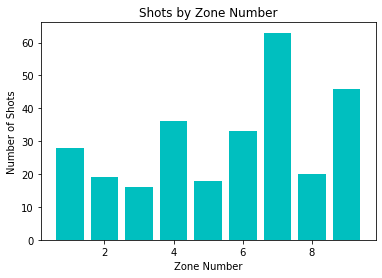

In [10]:
import matplotlib.pyplot as plt
df_all = pd.read_csv('world cup.csv')


def zone_shot(i):
    '''Returns dataframe of all shots to a certain zone'''
    zone = df_all.loc[df_all['Zone'] == i]
    return len(zone)

for i in range(1, 10):
    print('Zone', i, ':', zone_shot(i))
    
zone = [i for i in range(1, 10)]
shot_num = [zone_shot(i) for i in range(1, 10)]

plt.bar(zone, shot_num, color='c')
plt.xlabel('Zone Number')
plt.ylabel('Number of Shots')
plt.title('Shots by Zone Number')

Zone 1 : 0.75
Zone 2 : 0.5789473684210527
Zone 3 : 0.875
Zone 4 : 0.75
Zone 5 : 0.6111111111111112
Zone 6 : 0.7575757575757576
Zone 7 : 0.6349206349206349
Zone 8 : 0.6
Zone 9 : 0.7391304347826086


Text(0.5, 1.0, 'Accuracy by Zone Number')

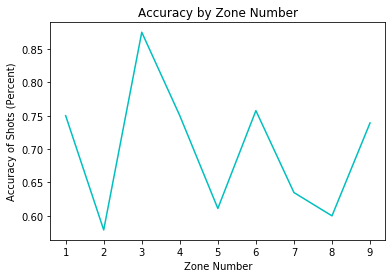

In [6]:
def zone_prob(i):
    '''Gets probability of goal scored based on shooting zone'''
    zone = df_all.loc[df_all['Zone'] == i]
    goal = zone[zone['Goal'] == 1.0]
    percent = len(goal) / len(zone)
    return percent
    
for i in range(1, 10):
    print('Zone', i, ':', zone_prob(i))
    
percents = [zone_prob(i) for i in range(1, 10)]

plt.plot(zone, percents, color='c')
plt.xlabel('Zone Number')
plt.ylabel('Accuracy of Shots (Percent)')
plt.title('Accuracy by Zone Number')

In [7]:
# dataframe of all right-footed penalty takers
right = pd.read_csv('world cup.csv')
right = right.dropna()
right = right.loc[right['Foot'] == 'R']
right

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0
1,1,GER,9.0,R,C,1.0,1.0,2,0.0
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0
3,1,GER,2.0,R,C,1.0,1.0,4,0.0
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0
...,...,...,...,...,...,...,...,...,...
299,30,CRO,7.0,R,L,1.0,1.0,6,0.0
300,30,RUS,7.0,R,R,1.0,1.0,7,0.0
301,30,CRO,4.0,R,R,1.0,1.0,8,0.0
302,30,RUS,7.0,R,R,1.0,1.0,9,1.0


In [8]:
# dataframe of all left-footed penalty takers
left = pd.read_csv('world cup.csv')
left = left.dropna()
left = left.loc[left['Foot'] == 'L']
left

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
6,1,FRA,8.0,L,L,1.0,0.0,7,0.0
17,2,FRA,9.0,L,R,1.0,1.0,6,0.0
18,2,BRA,4.0,L,R,1.0,1.0,7,0.0
22,3,GER,1.0,L,R,1.0,1.0,1,0.0
23,3,MEX,6.0,L,L,1.0,1.0,2,0.0
24,3,GER,8.0,L,L,1.0,1.0,3,0.0
39,4,BEL,5.0,L,R,1.0,1.0,8,0.0
42,5,ROM,3.0,L,R,1.0,1.0,1,0.0
43,5,IRE,2.0,L,R,1.0,1.0,2,0.0
46,5,ROM,4.0,L,L,1.0,1.0,5,0.0


In [9]:
elimination = pd.read_csv('world cup.csv')
elimination = elimination.dropna()
elimination = elimination.loc[elimination['Elimination'] == 1.0]
elimination

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
9,1,GER,9.0,R,C,1.0,1.0,10,1.0
11,1,GER,9.0,R,C,1.0,1.0,12,1.0
21,2,FRA,7.0,R,R,1.0,1.0,10,1.0
28,3,GER,4.0,R,L,1.0,1.0,7,1.0
40,4,SPA,1.0,R,R,1.0,1.0,9,1.0
41,4,BEL,5.0,R,L,1.0,1.0,10,1.0
51,5,IRE,6.0,R,l,1.0,1.0,10,1.0
61,6,YUG,6.0,R,R,1.0,0.0,10,1.0
70,7,ITA,9.0,L,R,1.0,0.0,9,1.0
80,8,ENG,1.0,L,L,0.0,0.0,9,1.0
